# CODING ASSIGNMENT 2
Authors: Tucker and Seamus


## Problem 1: Naive Polynomial Multiplication

In [5]:
# Input: two arrays of length n that describe the parameters of
# two n-degree polynomials
# Output: The coefficients of the product polynomial: array R[0:2n]
def naive_multiply(P, Q):
    n = max(len(P) - 1, len(Q) - 1)
    
    # create return array
    R = [0] * (2 * n + 1)

    # implement equation (1) from lecture 6 -- for every index k
    # in the return array, calculate the coefficient
    for k in range(0, 2 * n + 1):
        if k <= n:
            prod = 0
            for i in range(0, k + 1):
                prod += P[i] * Q[k - i]

        else:
            prod = 0
            for i in range(k - n, n + 1):
                prod += P[i] * Q[k - i]

        R[k] = prod

    return R

## Problem 2: Karatsuba Polynomial Multiplication

In [10]:
import math

In [115]:
# Input: two arrays of length n that describe the parameters of
# two n-degree polynomials
# Output: The coefficients of the product polynomial: array R[0:2n]
def karat_mult_poly(P, Q):
    n = max(len(P) - 1, len(Q) - 1)

    # Base case -- P and Q have 2 or less elements
    if n <= 1:
        return naive_multiply(P, Q)

    m = math.ceil(n/2)

    P1 = [0] * (m+1) # P'
    Q1 = [0] * (m+1) # Q' 
    
    # recall definitions of p1(x), p2(x), q1(x), q2(x)
    for i in range(0, m):
        P1[i] = P[i] + P[m + i]
        Q1[i] = Q[i] + Q[m + i]
    
    # in which case n = 2m since m = n/2 or (n+1)/2
    if n > (2*m) - 1:
        P1[m] = P[n]
        Q1[m] = Q[n]
    # array is initialized full of zeros so no need for else
    
    # now P1 has coefficients p1(x) + p2(x) and Q1 has the coefficients
    # q1(x) + q2(x). They are of degree m
    
    # R1 has coefficients of p1(x) * q1(x)
    R1 = karat_mult_poly(P[:m], Q[:m])
    # R2 has coefficients of p2(x) * q2(x)
    R2 = karat_mult_poly(P[m:], Q[m:])
    # R2 has coefficients of (p1(x)+p2(x)) * (q1(x)+q2(x))
    R3 = karat_mult_poly(P1, Q1)

    # Make sure R1, R2 have length 2*m by padding zeros
    while len(R1) < 2*m:
        R1.append(0)

    while len(R2) < 2*m:
        R2.append(0)
    
    while len(R3) < 2*m:
        R3.append(0)

    R4 = [0] * (2*m)

    for i in range(2 * m):
        R4[i] = R3[i] - R1[i] - R2[i]
    # R4 now has the coefficents of p1(x)*q2(x) + p2(x)*q1(x) 
    # and is degree 2m

    R = [0] * (2*n + 1)
    
    # Add results and pad zeros
    for i in range(len(R)):
        r1 = r2 = r4 = 0
        
        # Prevent index out of bounds
        if i < len(R1):
            r1 = R1[i]

        if i >= m and i-(m) < len(R4):
            r4 = R4[i-(m)]

        if i >= 2*(m):
            r2 = R2[i-(2*(m))]

        R[i] = r1 + r2 + r4

    return R

## Pi exercise

In [116]:
# Citation: taken from helper.py
def read_pi(n):
    # opens the file name "pi" and reads the first n digits
    # puts it in the list pi, and returns that list
    pi = list()
    f = open('../../Downloads/pi', 'r')
    for i in range(n):
        d = f.read(1)
        pi.append(int(d))
    return pi

In [121]:
# Input: non-negative integer n
# Output: an array R of the polynomial composed of the product
# of the first n+1 digits of pi multiplied by an identical array
def pi_by_pi(n):
    pi = read_pi(n+1)
    
    R = karat_mult_poly(pi, pi)    
    
    return R

In [122]:
# Input: non-negative integer n
# Output: the coefficients of the polynomial Rn described in CA2
def naive_pi_by_pi(n):
    pi = read_pi(n+1)
    
    R = naive_multiply(pi, pi)    
    
    return R

In [123]:
# Input: non-negative integer n
# Output: the sum of the squares of the coefficients of the
# polynomial Rn
def get_squared_sum(n):
    R = pi_by_pi(n)
    runningSum = 0
    
    for num in R:
        runningSum += num*num

    return runningSum

In [124]:
get_squared_sum(20000)

2193109171093891

## Exploring Run Time

First, we measure time using the time module of Python 3. Plot, as a function of n, n going from 1 to 10, 000 in jumps of 100, the time taken by both algorithms to compute rn(x). Show these two “curves” overlaid on the same plot. Clearly mark which is which. At roughly what n do you see Karatsuba “beating” the naive algorithm (if at all)?

In [22]:
import time
import matplotlib.pyplot as plt

In [30]:
# Input: non-negative integer n
# Output: the time needed to get the polynomial Rn using Karatsuba
# algorithm
def karat_time(n):
    start_time = time.time()
    pi_by_pi(n)
    end_time = time.time()

    return end_time - start_time

In [31]:
# Input: non-negative integer n
# Output: the time needed to get the polynomial Rn using Naive
# algorithm
def naive_time(n):
    start_time = time.time()
    naive_pi_by_pi(n)
    end_time = time.time()

    return end_time - start_time

In [32]:
# Input: non-negative integer n
# Output: graph of the result of naive_time(i) and karat_time(i)
# for i<=10,000 in jumps of 100
def compare_runtimes(n):
    X = list()
    Yfast = list()
    Yslow = list()
    # Calculate the run-time in increments of 100
    for i in range(1, n // 100):
        X.append(i * 100)
        Yfast.append(karat_time(i * 100))
        Yslow.append(naive_time(i * 100))
    
    plt.plot(X, Yfast, label="Karatsuba's Approach")
    plt.plot(X, Yslow, label="Naive Approach")
    plt.title('Run Time of Karatsuba vs. Naive Approach of Polynomial Multiplication')
    plt.legend(loc='upper left')
    plt.xlabel("Number of Digits of Pi Processed")
    plt.ylabel("Run Time (Seconds)")

    plt.show()

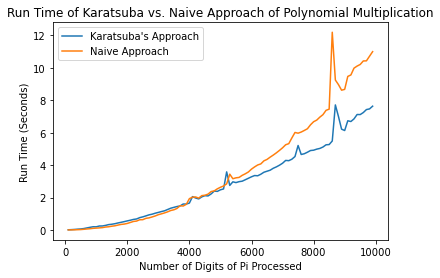

In [33]:
compare_runtimes(10000)

We see that after roughly 5000, Karutsuba consistently beats the Naive approach.

In [96]:
# Modification of the naive algorithm to include a counter
def naive_multiply_count(P, Q, ops = 0):
    n = max(len(P) - 1, len(Q) - 1)
    R = [0] * (2 * n + 1)

    for k in range(0, 2 * n + 1):
        if k <= n:
            prod = 0
            for i in range(0, k + 1):
                ops += 1
                prod += P[i] * Q[k - i]

        else:
            prod = 0
            for i in range(k - n, n + 1):
                ops += 1
                prod += P[i] * Q[k - i]

        R[k] = prod

    return R, ops

In [125]:
# Modification of the karat_mult_poly algorithm to add a counter
# of operations. See comments above for thorough comments
def karat_mult_poly_count(P, Q, ops=0):
    n = max(len(P) - 1, len(Q) - 1)

    if n <= 1:
        # Returns coefficients and run-time
        return naive_multiply_count(P, Q)

    m = math.ceil(n / 2)

    P1 = [0] * (m + 1)
    Q1 = [0] * (m + 1)

    for i in range(0, m):
        ops += 2
        P1[i] = P[i] + P[m + i]
        Q1[i] = Q[i] + Q[m + i]

    if n > (2 * m) - 1:
        P1[m] = P[n]
        Q1[m] = Q[n]

    # Get R1, R2, and R3 and increment counter
    R1, R1_ops = karat_mult_poly_count(P[:m], Q[:m])
    ops += R1_ops # increment ops counter
    R2, R2_ops = karat_mult_poly_count(P[m:], Q[m:])
    ops += R2_ops # increment ops counter
    R3, R3_ops = karat_mult_poly_count(P1, Q1)
    ops += R2_ops # increment ops counter

    if len(R1) < 2 * m:
        R1.append(0)

    if len(R2) < 2 * m:
        R2.append(0)

    R4 = [0] * (2 * m)

    for i in range(2 * m):
        ops += 1 # increment ops counter
        R4[i] = R3[i] - R1[i] - R2[i]

    R = [0] * (2 * n + 1)

    for i in range(len(R)):
        r1 = r2 = r4 = 0

        if i < len(R1):
            ops += 1 # increment ops counter
            r1 = R1[i]

        if i >= m and i - (m) < len(R4):
            ops += 1 # increment ops counter
            r4 = R4[i - (m)]

        if i >= 2 * (m):
            ops += 1 # increment ops counter
            r2 = R2[i - (2 * (m))]

        R[i] = r1 + r2 + r4

    return R, ops

In [126]:
# Input: non-negative integer n
# Ouptut: number of operations taken to calculate the Rn polynomial
# of degree n using the Karatsuba approach
def pi_by_pi_count(n):
    pi = read_pi(n+1)
    
    R = karat_mult_poly_count(pi, pi)[1]
    
    return R

In [127]:
# Input: non-negative integer n
# Ouptut: number of operations taken to calculate the Rn polynomial
# of degree n using the Karatsuba approach
def naive_multiply_pi_count(n):
    pi = read_pi(n+1)
    
    R = naive_multiply_count(pi, pi)[1]  
    
    return R

In [128]:
def compare_ops(n):
    X = list()
    Yfast = list()
    Yslow = list()
    # Calculate the run-time in increments of 100
    for i in range(1, n // 5):
        X.append(i * 5)
        Yfast.append(pi_by_pi_count(i * 5))
        Yslow.append(naive_multiply_pi_count(i * 5))
    
    plt.plot(X, Yfast, label="Karatsuba's Approach")
    plt.plot(X, Yslow, label="Naive Approach")
    plt.title('Operations of Karatsuba vs. Naive Approach of Polynomial Multiplication')
    plt.legend(loc='upper left')
    plt.xlabel("Number of Digits of Pi Processed")
    plt.ylabel("Number of Operations")

    plt.show()

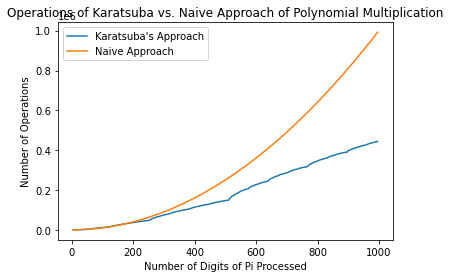

In [129]:
compare_ops(1000)

We see that after roughly n>=200, Karatsuba beats the Naive. We note that there is a discrepancy -- this n is much smaller than the n we found when calculating actual time. I guess that this is most likely because Karatsuba has much more overhead (e.g., maintaining the recursive stack) that take run-time in practice but is not punished in counting operations.

In [106]:
# Input: non-negative integer C
# Output: graph of C*i^log(3) vs number of operations for 
# pi_by_pi_count(i) for every integer 1<=i<=200
def karatsuba_vs_log(c):
    X = list()
    Yfast = list()
    Ylog = list()
    # Calculate the run-time in increments of 100
    for i in range(1, 200):
        X.append(i)
        Yfast.append(pi_by_pi_count(i))
        Ylog.append(c*math.pow(i,math.log(3,2)))
    
    plt.plot(X, Yfast, label="Karatsuba's Approach")
    plt.plot(X, Ylog, label="C times n^log2(3)")
    plt.title('Operations of Karatsuba vs. C*n^(log2(3))')
    plt.legend(loc='upper left')
    plt.xlabel("Number of Digits of Pi Processed")
    plt.ylabel("Number of Operations")

    plt.show()

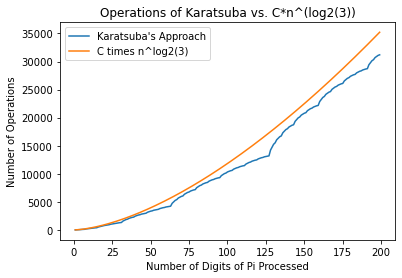

In [114]:
karatsuba_vs_log(8)

When we use C=8, we find that Karatsuba's time is bounded by the curve y(n) = C*n^log2(3)

*Credit Statement:* Discussion with Jorie